# **Lab-2 Geometric Rectification**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

### Utility Function

In [2]:
def bilinearInterpolation(img,gcp):
    BI_img = img.copy()
    rows,cols = img.shape
    for i in range(rows):
        for j in range(cols):
            if i in gcp[:,0] and j in gcp[:,1]:
                x1 = i-1 if i>0 else 0
                y1 = j-1 if i>0 else 0
                x2 = i+1
                y2 = j+1
                I_y1 = (img1[x1,y1]*(x2-i) + img1[x2,y1]*(i-x1))/(x2-x1)
                I_y2 = (img1[x1,y2]*(x2-i) + img1[x2,y2]*(i-x1))/(x2-x1)
                img_copy[i,j] = (I_y1*(y2-j) + I_y2*(j-y1))/(y2-y1)
    return BI_img

## **Lab Task-1:** Geometric Rectification of Satellite Imagery

### **Objective:** Correct the geometric distortions in satellite images using bilinear interpolation. 
### **Materials:** A distorted satellite image, ground control points (GCPs), and image processing software (such as Python with OpenCV). 

### **Steps**

#### 1. Import the distorted satellite image into the image processing software. 

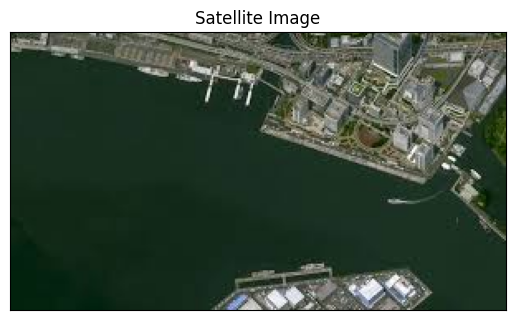

In [3]:
imgSat = cv2.cvtColor(cv2.imread('images/satelliteImage.jpeg'),cv2.COLOR_BGR2RGB)
plt.imshow(imgSat)
plt.xticks([])
plt.yticks([])
plt.title("Satellite Image")
plt.show()

#### 2. Identify and mark ground control points (GCPs) on the distorted image. 

In [4]:
#choosing random GCP values
rows, cols, _ = imgSat.shape
gcp = np.random.randint(min(rows,cols),size=(4,2))
gcp = np.asarray(gcp,dtype=np.float32)
gcp

array([[ 58.,  69.],
       [115., 156.],
       [ 11.,  97.],
       [ 37.,  23.]], dtype=float32)

#### 3. Define the corresponding coordinates for the GCPs in the rectified image

In [5]:
#assuming the points change by 20 pixels
m = min(rows,cols)
gcp_rectified = np.asarray([(i + np.random.randint(20))%m for i in gcp],dtype=np.float32)
gcp_rectified = np.asarray(gcp_rectified,dtype=np.float32)
gcp_rectified

array([[ 60.,  71.],
       [121., 162.],
       [ 30., 116.],
       [ 55.,  41.]], dtype=float32)

#### 4. Apply a transformation matrix to map the distorted image to the corrected coordinates.

In [6]:
transformation_matrix = cv2.getPerspectiveTransform(gcp, gcp_rectified)

#### 5. Use bilinear interpolation to resample the pixel values in the rectified image. 

In [7]:
rectified_image = cv2.warpPerspective(imgSat, transformation_matrix, 
                                      (imgSat.shape[1], imgSat.shape[0]),
                                      flags=cv2.INTER_LINEAR)

#### 6. Compare the rectified image with the original image to evaluate the effectiveness of the rectification process. 

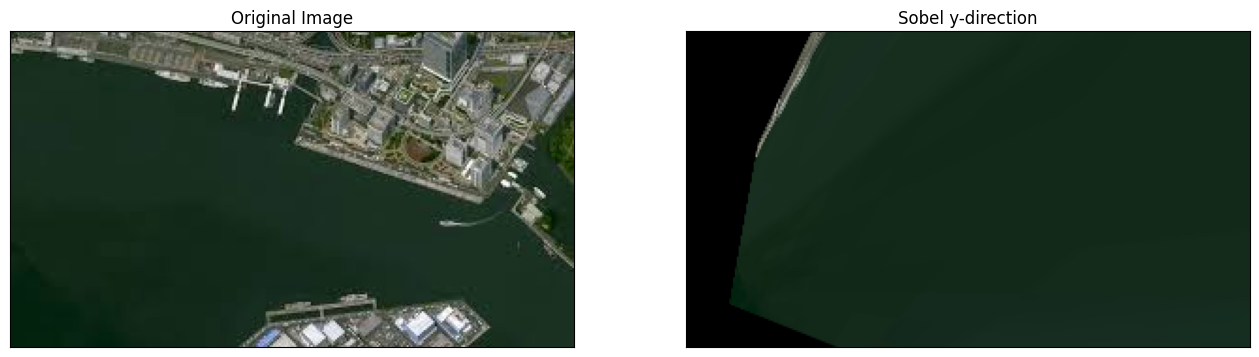

In [8]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
axs[0].imshow(imgSat)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title("Original Image")

axs[1].imshow(rectified_image)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("Sobel y-direction")
plt.show()

## **Lab Task-2:** Medical Image Rectification

### **Objective:** Rectify distortions in MRI images using bilinear interpolation.
### **Materials:** Distorted MRI images, reference anatomical model, and image processing software. 

### **Steps**

#### 1. Import the distorted MRI image into the image processing software. 

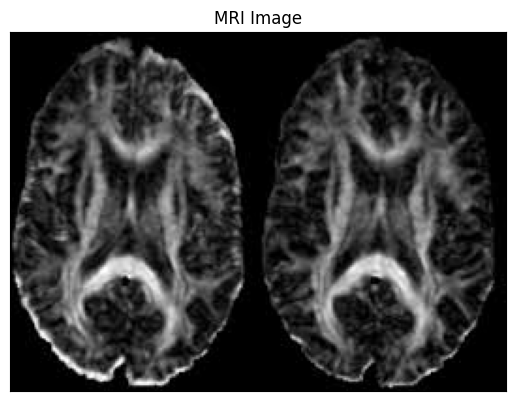

In [18]:
imgMRI = cv2.cvtColor(cv2.imread('images/imgMRI.jpeg'),cv2.COLOR_BGR2RGB)
plt.imshow(imgMRI)
plt.xticks([])
plt.yticks([])
plt.title("MRI Image")
plt.show()

In [10]:
imgMRI.shape

(191, 264, 3)

#### 2. Identify and mark key points on the distorted MRI image. 

In [11]:
#choosing random GCP values
rows, cols, _ = imgMRI.shape
gcp = [[5,5],[187,260],[187,5],[5,260]]
gcp = np.asarray(gcp,dtype=np.float32)
gcp

array([[  5.,   5.],
       [187., 260.],
       [187.,   5.],
       [  5., 260.]], dtype=float32)

#### 3. Obtain the corresponding coordinates from the reference anatomical model. 

In [12]:
#assuming the points change by 20 pixels
m = min(rows,cols)
gcp_rectified = [[0,0],[190,263],[190,0],[0,263]]
gcp_rectified = np.asarray(gcp_rectified,dtype=np.float32)
gcp_rectified

array([[  0.,   0.],
       [190., 263.],
       [190.,   0.],
       [  0., 263.]], dtype=float32)

#### 4. Apply a transformation matrix to align the MRI image with the reference model. 

In [13]:
transformation_matrix = cv2.getPerspectiveTransform(gcp, gcp_rectified)

#### 5. Use bilinear interpolation to resample the pixel values in the rectified image. 

In [14]:
rectified_image = cv2.warpPerspective(imgMRI, transformation_matrix, 
                                      (imgMRI.shape[1], imgMRI.shape[0]),
                                      flags=cv2.INTER_LINEAR)

#### 6. Compare the rectified MRI image with the reference model to assess accuracy. 

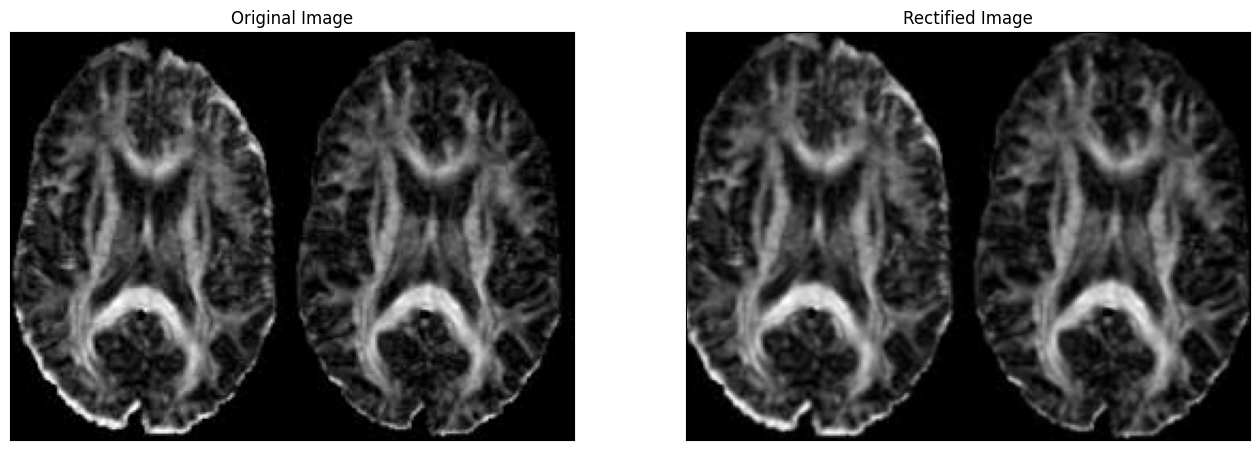

In [19]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
axs[0].imshow(imgMRI)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title("Original Image")

axs[1].imshow(rectified_image)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("Rectified Image")
plt.show()

## **Lab Task-3:** Drone Image Rectification

### **Objective:** Correct the geometric distortions in drone-captured images of an agricultural field using bilinear interpolation.
### **Materials:** Distorted drone images, control points from known field locations, and image processing software. 

### **Steps**

#### 1. Import the distorted drone image into the image processing software. 

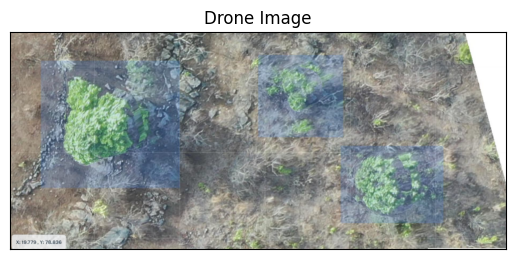

In [48]:
imgDrone = cv2.cvtColor(cv2.imread('images/imgDrone.jpg'),cv2.COLOR_BGR2RGB)
plt.imshow(imgDrone)
plt.xticks([])
plt.yticks([])
plt.title("Drone Image")
plt.show()

In [49]:
imgDrone.shape

(815, 1861, 3)

#### 2. Identify and mark ground control points (GCPs) on the distorted image. 

In [50]:
#choosing random GCP values
rows, cols, _ = imgDrone.shape
gcp = [[0,0],[750,1700],[814,0],[0,1860]]
gcp = np.asarray(gcp,dtype=np.float32)
gcp

array([[   0.,    0.],
       [ 750., 1700.],
       [ 814.,    0.],
       [   0., 1860.]], dtype=float32)

#### 3. Define the corresponding coordinates for the GCPs in the rectified image

In [51]:
#assuming the points change by 20 pixels
m = min(rows,cols)
gcp_rectified = [[0,0],[814,1861],[814,0],[0,1860]]
gcp_rectified = np.asarray(gcp_rectified,dtype=np.float32)
gcp_rectified

array([[   0.,    0.],
       [ 814., 1861.],
       [ 814.,    0.],
       [   0., 1860.]], dtype=float32)

#### 4. Apply a transformation matrix to map the distorted image to the corrected coordinates.

In [52]:
transformation_matrix = cv2.getPerspectiveTransform(gcp, gcp_rectified)

#### 5. Use bilinear interpolation to resample the pixel values in the rectified image. 

In [53]:
rectified_image = cv2.warpPerspective(imgDrone, transformation_matrix, 
                                      (imgDrone.shape[1], imgDrone.shape[0]),
                                      flags=cv2.INTER_LINEAR)

#### 6. Generate an orthophoto of the field and compare it with the original image. 

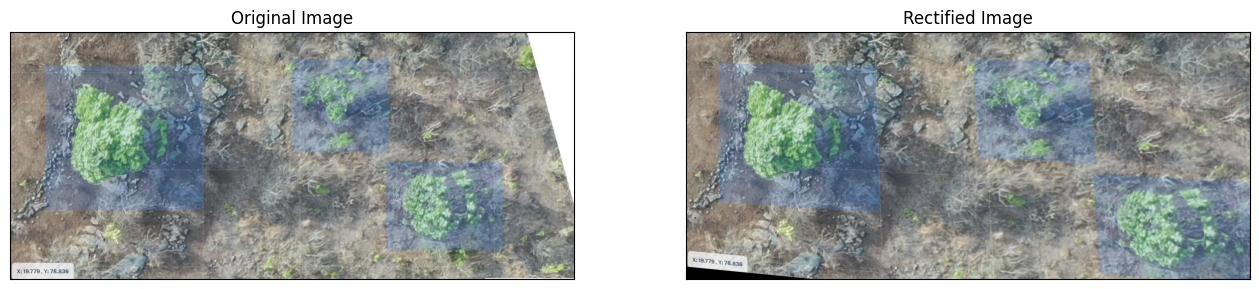

In [54]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
axs[0].imshow(imgDrone)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title("Original Image")

axs[1].imshow(rectified_image)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("Rectified Image")
plt.show()

## **Lab Task-4:** Historical Photo Restoration

### **Objective:** Rectify and restore old, distorted photographs using bilinear interpolation.
### **Materials:** Scanned old photographs, reference images, and image processing software. 

### **Steps**

#### 1. Import the scanned old photograph into the image processing software. 

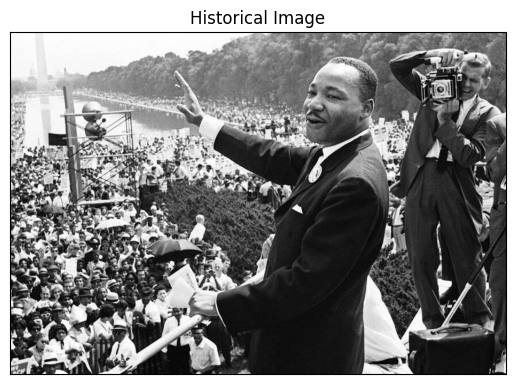

In [90]:
imgHist = cv2.cvtColor(cv2.imread('images/imgHist.jpeg'),cv2.COLOR_BGR2RGB)
plt.imshow(imgHist)
plt.xticks([])
plt.yticks([])
plt.title("Historical Image")
plt.show()

In [91]:
imgHist.shape

(597, 865, 3)

#### 2. Identify and mark key points on the distorted photograph. 

In [98]:
#choosing random GCP values
rows, cols, _ = imgHist.shape
gcp = [[40,834],[40,40],[566,40],[566,834]]
gcp = np.asarray(gcp,dtype=np.float32)
gcp

array([[ 40., 834.],
       [ 40.,  40.],
       [566.,  40.],
       [566., 834.]], dtype=float32)

#### 3. Obtain the corresponding coordinates from a reference image or known dimensions. 

In [99]:
#assuming the points change by 20 pixels
m = min(rows,cols)
gcp_rectified = [[0,864],[0,0],[596,0],[596,864]]
gcp_rectified = np.asarray(gcp_rectified,dtype=np.float32)
gcp_rectified

array([[  0., 864.],
       [  0.,   0.],
       [596.,   0.],
       [596., 864.]], dtype=float32)

#### 4. Apply a transformation matrix to align the distorted photograph with the reference coordinates. 

In [100]:
transformation_matrix = cv2.getPerspectiveTransform(gcp, gcp_rectified)

#### 5. Use bilinear interpolation to resample the pixel values in the rectified image. 

In [101]:
rectified_image = cv2.warpPerspective(imgHist, transformation_matrix, 
                                      (imgHist.shape[1], imgHist.shape[0]),
                                      flags=cv2.INTER_LINEAR)

#### 6. Compare the rectified photograph with the original scanned image and the reference image. 

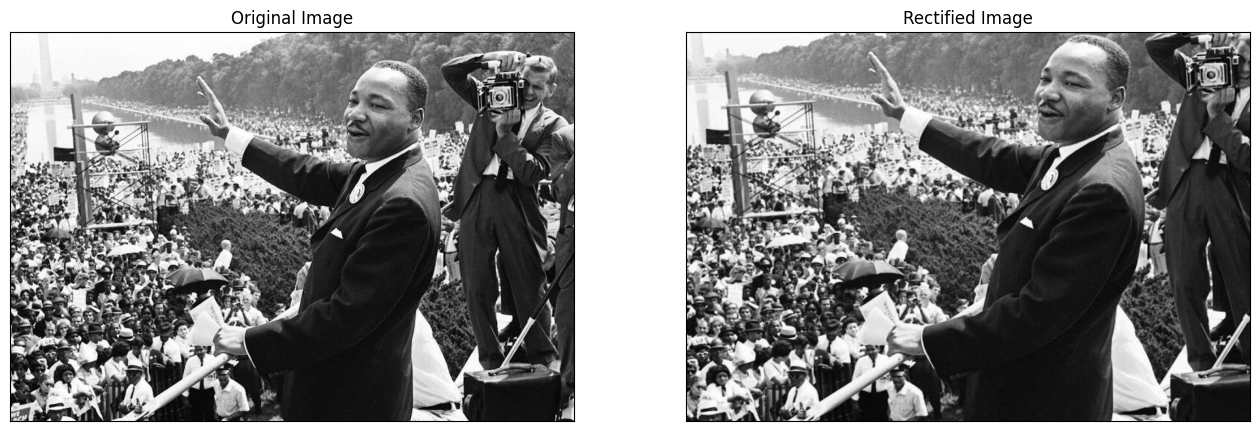

In [102]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
axs[0].imshow(imgHist)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title("Original Image")

axs[1].imshow(rectified_image)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("Rectified Image")
plt.show()

## **Lab Task-5:** Architectural Image Rectification

### **Objective:** Rectify perspective distortions in architectural images using bilinear interpolation.
### **Materials:** Distorted architectural images, known dimensions of the building, and image processing software. 

### **Steps**

#### 1. Import the distorted architectural image into the image processing software. 

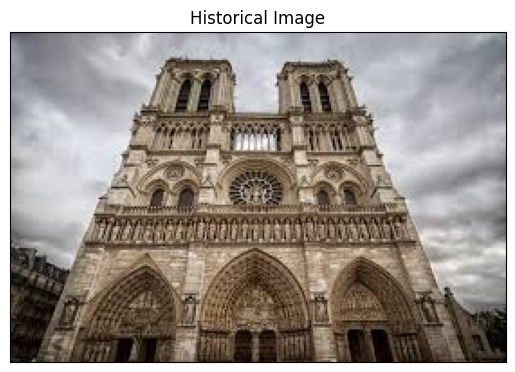

In [85]:
imgArch = cv2.cvtColor(cv2.imread('images/imgArch.jpeg'),cv2.COLOR_BGR2RGB)
plt.imshow(imgArch)
plt.xticks([])
plt.yticks([])
plt.title("Historical Image")
plt.show()

In [86]:
imgArch.shape

(183, 275, 3)

#### 2. Identify and mark key points on the distorted image corresponding to known dimensions of the building. 

In [80]:
#choosing random GCP values
rows, cols, _ = imgHist.shape
gcp = [[0,170],[129,0],[145,0],[274,170]]
gcp = np.asarray(gcp,dtype=np.float32)
gcp

array([[  0., 170.],
       [129.,   0.],
       [145.,   0.],
       [274., 170.]], dtype=float32)

#### 3. Define the corresponding coordinates for these points in the rectified image. 

In [81]:
#assuming the points change by 20 pixels
m = min(rows,cols)
gcp_rectified = [[0,170],[125,0],[150,0],[274,170]]
gcp_rectified = np.asarray(gcp_rectified,dtype=np.float32)
gcp_rectified

array([[  0., 170.],
       [125.,   0.],
       [150.,   0.],
       [274., 170.]], dtype=float32)

#### 4. Apply a transformation matrix to align the distorted image with the known dimensions.

In [82]:
transformation_matrix = cv2.getPerspectiveTransform(gcp, gcp_rectified)

#### 5. Use bilinear interpolation to resample the pixel values in the rectified image. 

In [87]:
rectified_image = cv2.warpPerspective(imgArch, transformation_matrix, 
                                      (imgArch.shape[1], imgArch.shape[0]),
                                      flags=cv2.INTER_LINEAR)

#### 6. Compare the rectified image with the original distorted image to evaluate the correction. 

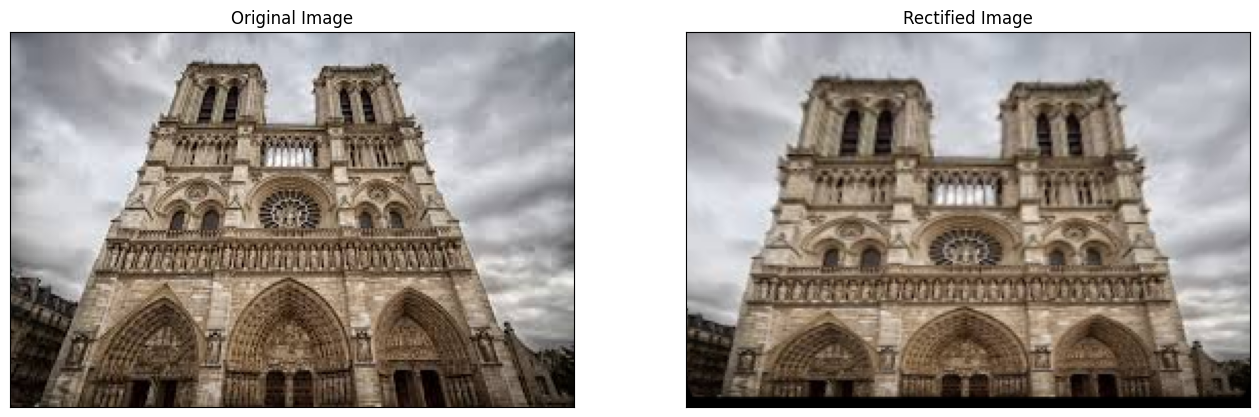

In [88]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
axs[0].imshow(imgArch)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title("Original Image")

axs[1].imshow(rectified_image)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("Rectified Image")
plt.show()